In [249]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [250]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

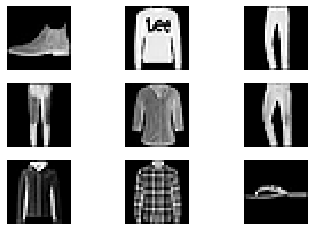

In [270]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_test[k], cmap="gray")
    plt.axis('off')
plt.show()

In [252]:
y_train_full[:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

In [254]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

10000


In [263]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layer(200),
    my_dense_layer(100),
    my_dense_layer(10, activation="softmax")
])

In [264]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [265]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 17s 313us/sample - loss: 0.5403 - accuracy: 0.8225 - val_loss: 0.4309 - val_accuracy: 0.8632
Epoch 2/5
55000/55000 [==============================] - 16s 285us/sample - loss: 0.4255 - accuracy: 0.8619 - val_loss: 0.4108 - val_accuracy: 0.8708
Epoch 3/5
55000/55000 [==============================] - 17s 309us/sample - loss: 0.3924 - accuracy: 0.8733 - val_loss: 0.3867 - val_accuracy: 0.8780
Epoch 4/5
55000/55000 [==============================] - 17s 303us/sample - loss: 0.3767 - accuracy: 0.8797 - val_loss: 0.4003 - val_accuracy: 0.8720
Epoch 5/5
55000/55000 [==============================] - 17s 311us/sample - loss: 0.3618 - accuracy: 0.8861 - val_loss: 0.4148 - val_accuracy: 0.8704


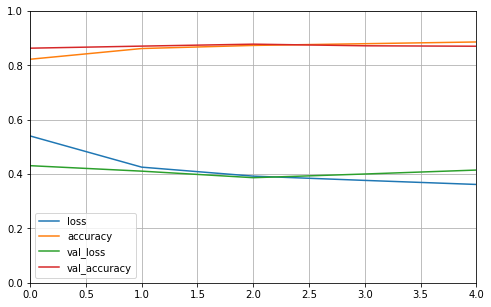

In [266]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [267]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5106   11  110  212   17    4   58    0   25    0]
 [   8 5370    2   57    3    0    3    0    1    0]
 [  77    7 4825   52  417    0   86    0   32    0]
 [ 114   79   77 5076  122    0   24    0    7    0]
 [   9   13  574  223 4545    0  128    0   20    0]
 [   0    0    0    0    0 5445    0   56    3    3]
 [1317   12  828  175  481    0 2635    0   59    0]
 [   0    0    0    0    0  170    0 5258    1   59]
 [  23    3   13   15   18   14    5   18 5400    1]
 [   0    1    0    0    0  142    0  303    0 5048]]


In [268]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 4.8855 - accuracy: 0.1000

Test accuracy: 0.1
